# <span style="color:gray">apply( )</span> - Calculate Project Salary Next Year

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [4]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()

def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [5]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary * 1.03)

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [6]:
import ast


In [7]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

In [8]:
df['job_skills'][10]

['python', 'databricks', 'azure', 'spark']

In [9]:
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [10]:
type(df['job_skills'][10])

list

# Calculate projected salary next year

##### * Senior roles assume 5%
##### * Other roles assume 3%

In [11]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary * 1.03)

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [12]:
def projected_salary(row):
    if "Senior" in row['job_title_short']:
        return 1.05 * row['salary_year_avg']
    else:
        return 1.03 * row['salary_year_avg']


df_salary['salary_year_inflated'] = df_salary.apply(projected_salary, axis=1)

df_salary[['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


In [13]:
df['job_posted_date_str'] = df['job_posted_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

df[['job_posted_date', 'job_posted_date_str']].head(10)

,job_posted_date,job_posted_date_str
0,2023-06-16 13:44:15,2023-06-16
1,2023-01-14 13:18:07,2023-01-14
2,2023-10-10 13:14:55,2023-10-10
3,2023-07-04 13:01:41,2023-07-04
4,2023-08-07 14:29:36,2023-08-07
5,2023-11-07 14:01:59,2023-11-07
6,2023-03-27 13:18:18,2023-03-27
7,2023-12-07 13:40:49,2023-12-07
8,2023-06-05 13:44:34,2023-06-05
9,2023-04-23 13:02:57,2023-04-23


In [14]:
from datetime import datetime

In [22]:
current_date = datetime.now()

df['days_since_posted'] = (current_date - df['job_posted_date']).dt.days

df[['days_since_posted', 'job_posted_date']]



464.0

<Axes: xlabel='job_title_short'>

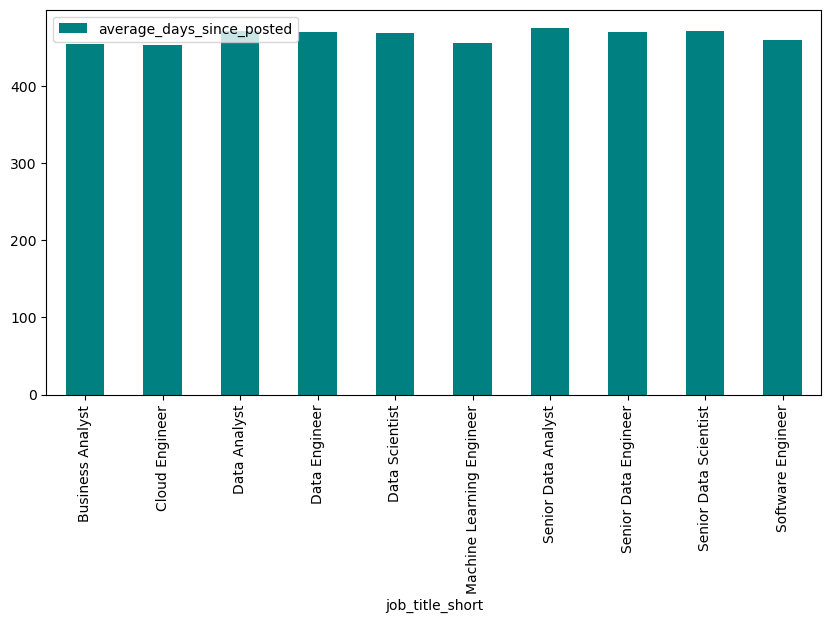

In [27]:
average_days_since_posted = df.groupby('job_title_short')['days_since_posted'].mean().reset_index()
average_days_since_posted.columns = ['job_title_short', 'average_days_since_posted']
average_days_since_posted.plot(kind='bar', x='job_title_short', y='average_days_since_posted', figsize=(10, 5), color='teal')